# Third homework

## Optimization via Gradient Descent

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Below the Gradient Descent algorithm that will be discussed in the homework is implemented.

In [25]:
def GD( f, grad_f, x0, alpha, maxit=100, tolf=1e-5, tolx=1e-5):
    f_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1,))
    xks = []
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))

    for k in range (maxit):
        x = x0 - alpha * grad_f(x0)

        f_val[k+1]= f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))
        xks.append(x0)
        
        if np.linalg.norm(grad_f(x)) <= tolf * grad_norm[0] or np.linalg.norm(x - x0) < tolx :
            break 

        x0 = x
        
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return xks, k, f_val, grad_norm

In the following snippet the backtracking version of Gradient Descent is written.

In [26]:
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25  
    
    grad = grad_f(x)
    # For the fifth function case
    if grad.ndim == 0:
        grad = grad.reshape(1)
    while f(x - alpha * grad) > f(x) - c * alpha * np.linalg.norm(grad, 2) ** 2:
        alpha = tau * alpha
    return alpha

def GD_backtracking(f, grad_f, x0, maxit=100, tolf=1e-5, tolx=1e-5):
    f_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1,))
    xks = []

    f_val[0] = f(x0)
    grad_norm[0] = np.linalg. norm(grad_f(x0))

    for k in range (maxit):
        alpha = backtracking(f, grad_f, x0)
        x = x0   - alpha * grad_f(x0)

        f_val[k+1]= f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))
        xks.append(x0)

        if np.linalg.norm(grad_f(x)) <= tolf * grad_norm[0] or np.linalg.norm(x - x0) < tolx :
            break 

        x0 = x
        
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return xks, k, f_val, grad_norm

In the following I am going to define the general procedure I will use for testing the algorithm on the first two considered functions. The procedure prints the solution found by the algorithm and plots both the gradient norms and the norm representing the distance of the solutions at each iteration of the algorithm to the true solution.

In [27]:
from tabulate import tabulate

def test(f, grad_f, x0, alphas, true):

    xks_b, k_b, f_val_b, grad_norm_b = GD_backtracking(f, grad_f, x0)
    
    solutions = []
    ks = []
    f_vals = []
    grad_norms = []
    xkss = []

    for alpha in alphas:
        xks, k, f_val, grad_norm = GD(f, grad_f, x0, alpha)
        solutions.append(xks[-1])
        ks.append(k)
        f_vals.append(f_val)
        grad_norms.append(grad_norm)
        xkss.append(xks)

    ks.append(k_b)
    solutions.append(xks_b[-1])

    headers = ["Alpha assignment", "Solutions", "Iterations"]
    table = []
    for i, alpha in enumerate(alphas):
            solution = solutions[i]
            iters = ks[i]
            table.append([alpha, str(solution), iters])
    table.append(['Backtracking', str(solutions[-1]), ks[-1]])
    print(tabulate(table, headers=headers, tablefmt="grid"))

    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plot_gradient(alphas, grad_norms, grad_norm_b)
    plt.subplot(1,2,2)
    plot_solution_norm(alphas, xkss, xks_b, true)
    plt.show()

def plot_gradient(alphas, grad_norms, grad_norm_b):
    for i in range(len(alphas)):
        plt.plot(grad_norms[i], label=f'alpha={round(alphas[i],2)}')
    plt.plot(grad_norm_b, label='backtracking')
    plt.legend() 
    plt.xlabel('Iteration')  
    plt.ylabel('Gradient Norm')  
    plt.title('Gradient Norms for Different Alphas')

def plot_solution_norm(alphas, xs, xk_b, true):
    for i in range(len(alphas)):
        plt.plot([np.linalg.norm(x - true, 2) for x in xs[i]], label=f'alpha={round(alphas[i],2)}')
    plt.plot([np.linalg.norm(x - true, 2) for x in xk_b], label='backtracking')
    plt.legend() 
    plt.xlabel('Iteration')  
    plt.ylabel(r'$\|\mathbf{x_k - x*}\|_2$')  
    plt.title('Distance from true solution')


**First function analysis**

The function considered in this experiment is $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ such that
$$f(x_1,x_2) = (x_1 - 3)^{2} + (x_2 -1)^2$$

The function is a convex function and because of this we know that GD with a suitable choice of $\alpha$ will converge to the global optima. The function and its gradient, $\nabla f(x_1,x_2)=(2(x_1-3), 3(x_2 - 1))^T$, are implemented below.

In [28]:
def f1(x):
    return ((x[0] - 3)**2 + (x[1] - 1)**2)

def grad_f1(x):
    return np.array([2*(x[0] - 3), 2*(x[1] - 1)])


In the following snippet the result of the previously defined testing method on the considered function can be observed. As previously said the algorithm converges to the global minima for all considered values of $\alpha < 1$, apart from $0.05$ because it's too small and can't converge in $100$ iterations. 

+--------------------+-------------------------+--------------+
| Alpha assignment   | Solutions               |   Iterations |
+====================+=========================+==============+
| 0.05               | [2.99991146 0.99997049] |           99 |
+--------------------+-------------------------+--------------+
| 0.3                | [2.99994967 0.99998322] |           12 |
+--------------------+-------------------------+--------------+
| 0.55               | [3.00003 1.00001]       |            5 |
+--------------------+-------------------------+--------------+
| 0.8                | [2.99996051 0.99998684] |           22 |
+--------------------+-------------------------+--------------+
| Backtracking       | [2.99993117 0.99997706] |           80 |
+--------------------+-------------------------+--------------+


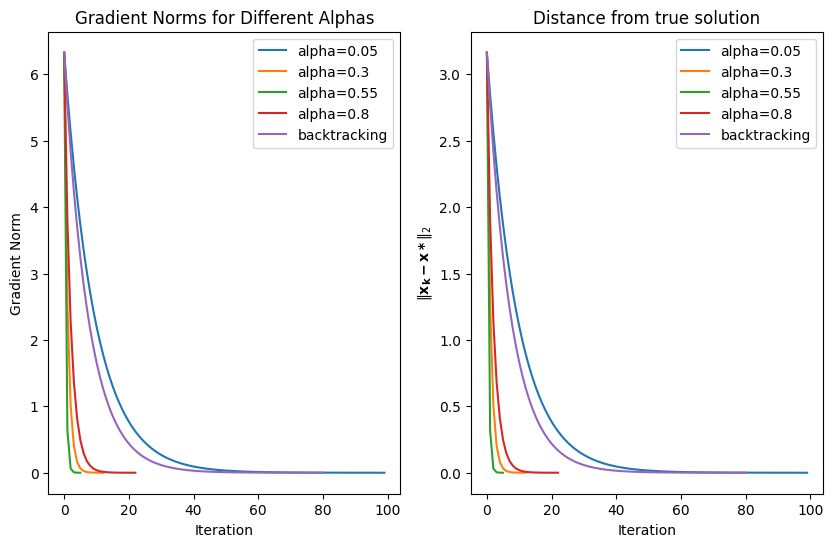

In [29]:
test(f1, grad_f1, np.zeros((2,)), np.arange(0.05,1,0.25), true=np.array([3,1]))

For to large values of $\alpha$, i.e. $\alpha \ge 1$, the optimization algorithm is not able to converge to the global optima. In particular if $\alpha=1$ then the descent algorithm oscilates around the global minima never decreasing the gradient norm. For $\alpha>1$ the step size becomes so large that the GD algorithm diverges - every iteration increases the gradient's norm.

+--------------------+---------------------------+--------------+
| Alpha assignment   | Solutions                 |   Iterations |
+====================+===========================+==============+
| 1.0                | [6. 2.]                   |           99 |
+--------------------+---------------------------+--------------+
| 1.01               | [24.3077827   8.10259423] |           99 |
+--------------------+---------------------------+--------------+
| Backtracking       | [2.99993117 0.99997706]   |           80 |
+--------------------+---------------------------+--------------+


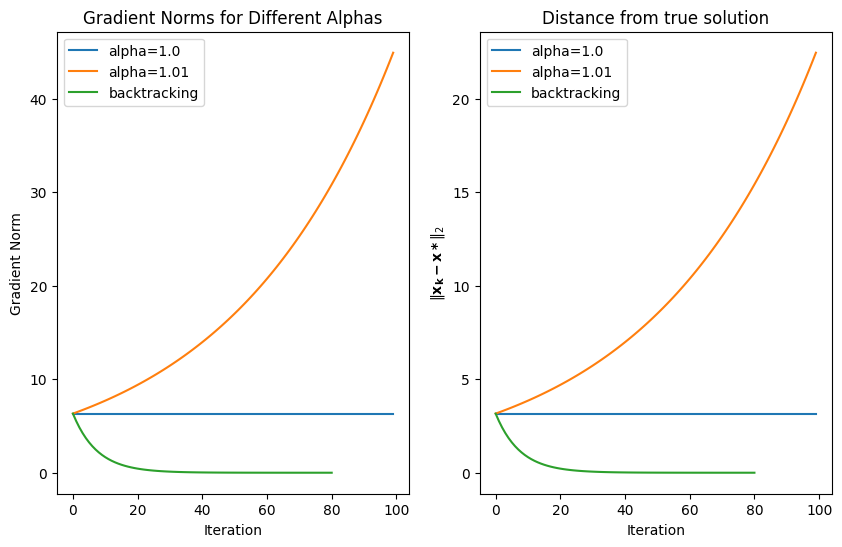

In [30]:
test(f1, grad_f1, np.zeros((2,)), np.array([1, 1.01]), true=np.array([3,1]))

In the following I will visualize the contour plot and I will visualize the path described by the iterations of GD for different values of $\alpha$ and for the case of backtracking. In particular I set $\alpha=0.3$ and $\alpha=1$ to visualize better the meaning of the statement that with $\alpha=1$ the algorithm oscilates around the global minima, without decreasing the gradient's norm.

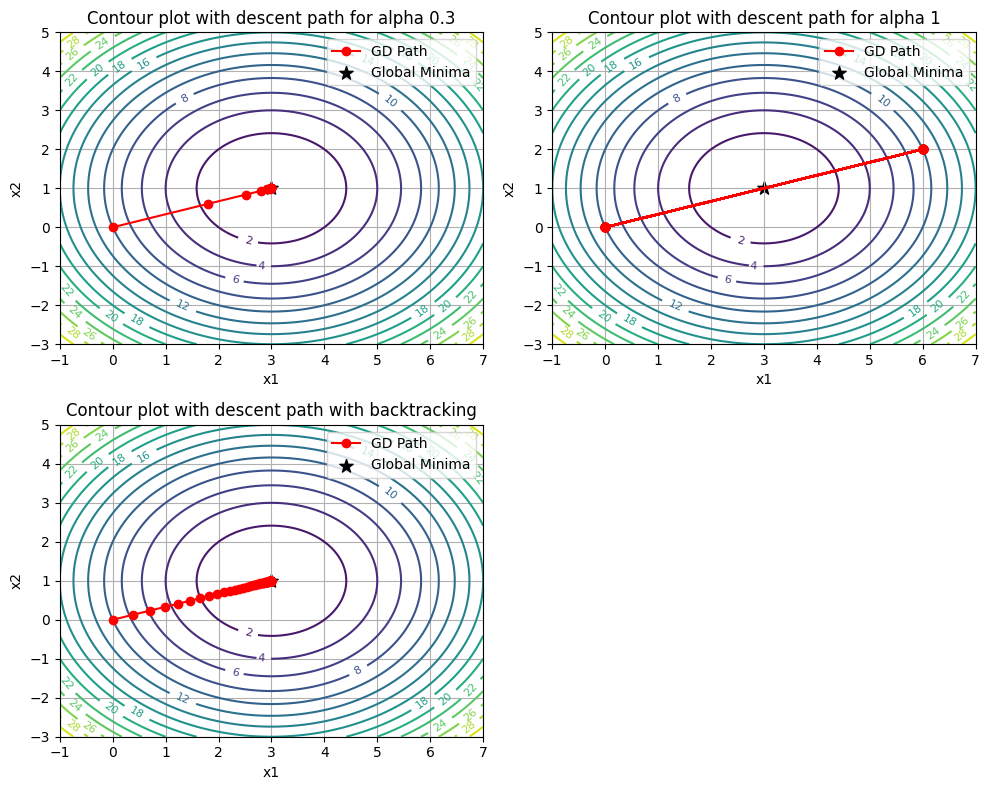

In [31]:
plt.figure(figsize=(10, 8))
c = 1
for alpha in [0.3,1]:
    xs, k, f_val, grad_norm = GD(f1, grad_f1, np.array([0,0]), alpha)
    plt.subplot(2,2,c)
    x = np.linspace(-1, 7, 100)
    y = np.linspace(-3, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f1([i, j]) for i, j in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

    contour = plt.contour(X, Y, Z, levels=20)
    plt.clabel(contour, inline=True, fontsize=8) 
    xs = np.array(xs)
    
    plt.plot(xs[:, 0], xs[:, 1], 'ro-', label="GD Path")  
    plt.scatter([3], [1], color='black', marker='*', s=100, label="Global Minima")  
    plt.title(f"Contour plot with descent path for alpha {alpha}")
    plt.xlabel(r"x1")
    plt.ylabel(r"x2")
    plt.legend()
    plt.grid(True)
    c += 1

xs, k, f_val, grad_norm = GD_backtracking(f1, grad_f1, np.array([0,0]))
plt.subplot(2,2,c)
x = np.linspace(-1, 7, 100)
y = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([[f1([i, j]) for i, j in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

contour = plt.contour(X, Y, Z, levels=20)
plt.clabel(contour, inline=True, fontsize=8) 
xs = np.array(xs)
 
plt.plot(xs[:, 0], xs[:, 1], 'ro-', label="GD Path")  
plt.scatter([3], [1], color='black', marker='*', s=100, label="Global Minima")  
plt.title(f"Contour plot with descent path with backtracking")
plt.xlabel(r"x1")
plt.ylabel(r"x2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Second function analysis**

The function considered in this experiment is $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ such that:
$$f(x_1,x_2) = 10(x_1 - 1)^{2} + (x_2 -2)^2$$

This function is also a convex function and so, also in this case the descent algorithm with a suitable choice of $\alpha$ will converge to the global optima. The gradient of this function is $\nabla f(x_1,x_2) = (20(x_1 - 1), 2(x_2 - 2))^T$ and is implemented together with the function in the following code.

In [32]:
def f2(x):
    return (10 *(x[0] - 1)**2 + (x[1] - 2)**2)

def grad_f2(x):
    return np.array([20*(x[0] - 1), 2*(x[1] - 2)])

As in the first analysis, also with the new function $f$, if the value for $\alpha$ is increased too much than the algorithm diverges. The reasoning done with the previous function can be repeated also in this case with one important difference, that resides in the magnitude of the _allowed_ $\alpha$. In this case for $\alpha < 0.1$ the algorithm converges (not in $100$ iterations if $\alpha$ to small). For $\alpha=0.1$ the algorithm oscilates around the minima and for $\alpha>0.1$ it diverges.

The difference in the $\alpha$ scale is the consequence of the problem related to the **conditioning** of the optimization problem, which I will adress later on when I will consider the contour plot of the function.

+--------------------+-------------------------+--------------+
| Alpha assignment   | Solutions               |   Iterations |
+====================+=========================+==============+
| 0.01               | [1.         1.72934785] |           99 |
+--------------------+-------------------------+--------------+
| 0.05               | [1.         1.99988893] |           93 |
+--------------------+-------------------------+--------------+
| 0.09               | [0.99999087 1.99993403] |           52 |
+--------------------+-------------------------+--------------+
| Backtracking       | [1.         1.99989307] |           79 |
+--------------------+-------------------------+--------------+


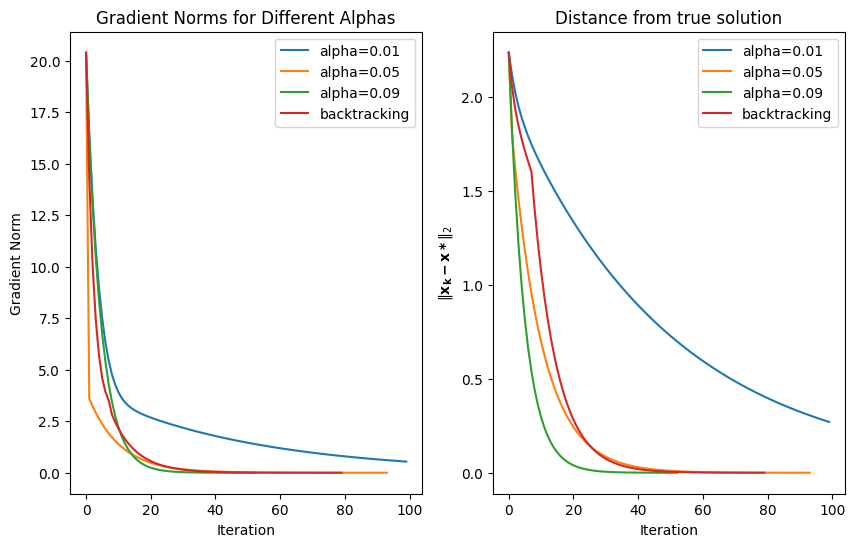

In [33]:
test(f2, grad_f2, np.zeros((2,)), np.arange(0.01,0.1,0.04), true=np.array([1,2]))

Below the oscillation and the divergence for $\alpha=0.1$ and $\alpha=0.101$, respectively, are visualized.

+--------------------+-------------------------+--------------+
| Alpha assignment   | Solutions               |   Iterations |
+====================+=========================+==============+
| 0.1                | [2. 2.]                 |           99 |
+--------------------+-------------------------+--------------+
| 0.101              | [8.10259423 2.        ] |           99 |
+--------------------+-------------------------+--------------+
| Backtracking       | [1.         1.99989307] |           79 |
+--------------------+-------------------------+--------------+


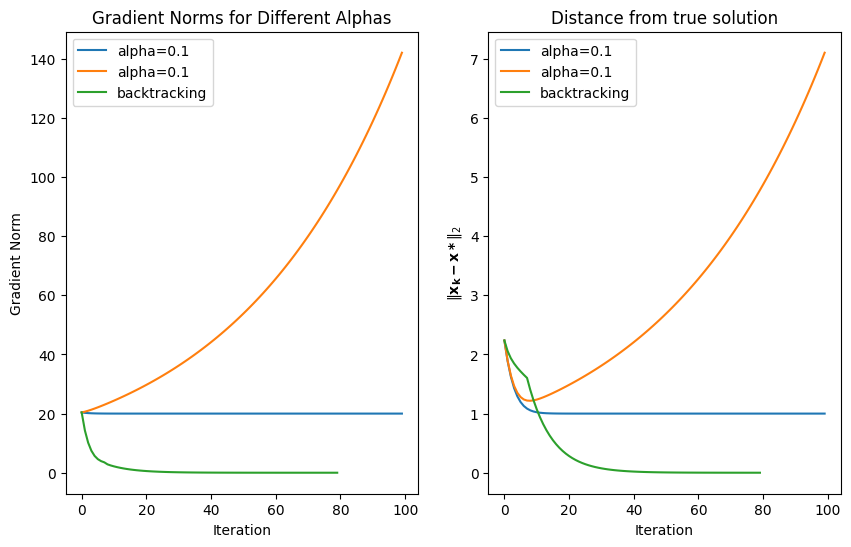

In [34]:
test(f2, grad_f2, np.zeros((2,)), np.array([0.1, 0.101]), true=np.array([1,2]))

The following code plots the contour plot of the considered function and on it the evolution of the tentative solutions provided by the Gradient Descent algorithm. The visualization is done for four different values for $\alpha$ and for the case where backtracking is used:
- $\alpha=0.01$: in this case the step size is too small and the algorithm is not able to converge to the global optima before `maxit`, i.e. $100$ iterations.
- $\alpha=0.09$: the selected $\alpha$ value is in this case the correct one as the algorithm is able to descent the function surface and find the global minima.
- $\alpha=0.1$: the step size is in this case responsible for the oscilations around the optima and the not convergence of the GD.
- $\alpha=0.101$: the selected step size implies the divergence of the algorithm because at every iteration the new solution $x_k$ has a higher value $f(x_k)$, thus moving away from the optima. 

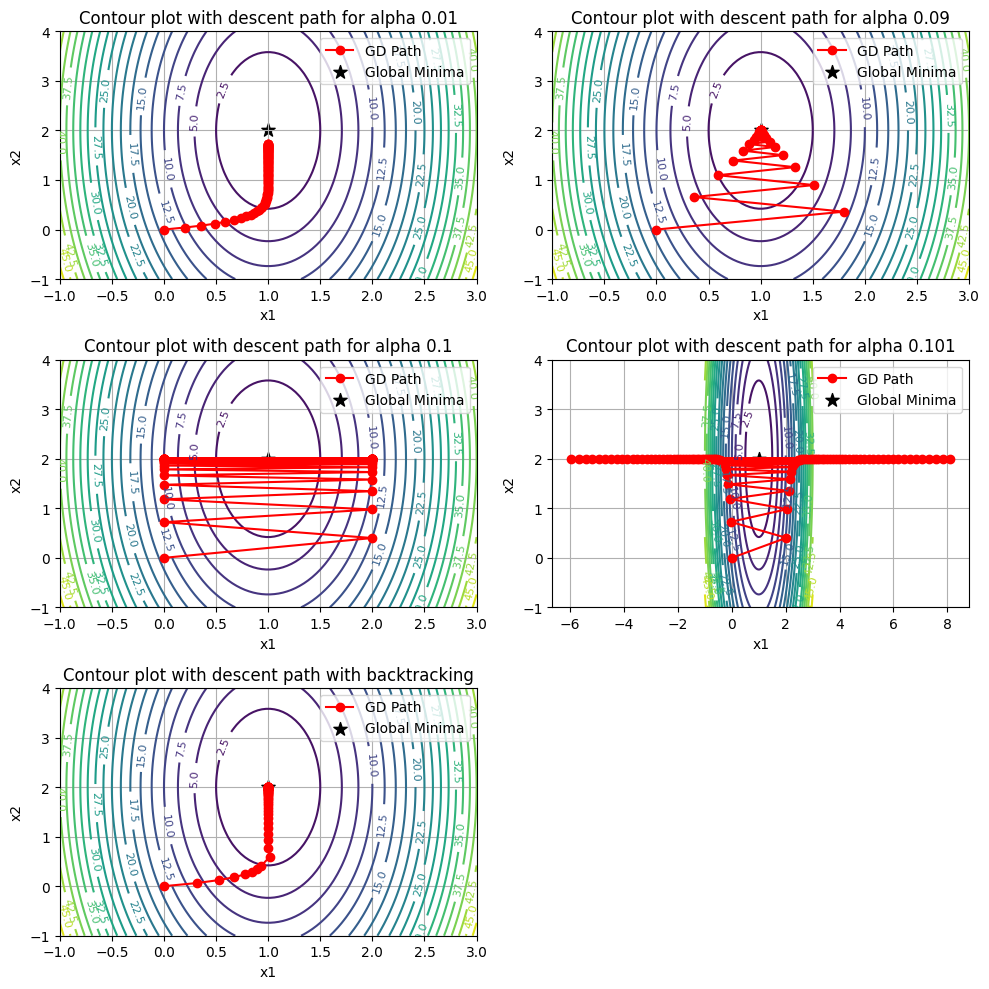

In [35]:
plt.figure(figsize=(10, 10))
c = 1
for alpha in [0.01,0.09,0.1, 0.101]:
    xs, k, f_val, grad_norm = GD(f2, grad_f2, np.array([0,0]), alpha)
    plt.subplot(3,2,c)
    x = np.linspace(-1, 3, 100)
    y = np.linspace(-1, 4, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f2([i, j]) for i, j in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

    contour = plt.contour(X, Y, Z, levels=20)
    plt.clabel(contour, inline=True, fontsize=8) 
    xs = np.array(xs)
    
    plt.plot(xs[:, 0], xs[:, 1], 'ro-', label="GD Path")  
    plt.scatter([1], [2], color='black', marker='*', s=100, label="Global Minima")  
    plt.title(f"Contour plot with descent path for alpha {alpha}")
    plt.xlabel(r"x1")
    plt.ylabel(r"x2")
    plt.legend()
    plt.grid(True)
    c += 1

xs, k, f_val, grad_norm = GD_backtracking(f2, grad_f2, np.array([0,0]))
plt.subplot(3,2,c)
x = np.linspace(-1, 3, 100)
y = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([[f2([i, j]) for i, j in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
contour = plt.contour(X, Y, Z, levels=20)
plt.clabel(contour, inline=True, fontsize=8) 
xs = np.array(xs)
  
plt.plot(xs[:, 0], xs[:, 1], 'ro-', label="GD Path")  
plt.scatter([1], [2], color='black', marker='*', s=100, label="Global Minima")  
plt.title(f"Contour plot with descent path with backtracking")
plt.xlabel(r"x1")
plt.ylabel(r"x2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

As mentioned before the difference between the first two optimization problems lays in their **conditioning**. The conditioning of an optimization problem is linked to how different the curvature of the function is in different directions. 

It is known that if a problem is well conditioned, like the first function where the curvature was the same for both directions gradient descent can do faster progress. However, in ill conditioned problems GD can only make slower progress to avoid diverging in the steeper direction. In our case for the second function, as can be seen from the plots the steeper direction is the $x$ one and in fact with $\alpha=0.101$ the algorithm diverges in exactly $x_1$.

**Third function analysis**

The function considered in this experiment is $f: \mathbb{R}^n \rightarrow \mathbb{R}$ such that
$$f(x) = \frac{1}{2}\|Ax - b\|^{2}_{2},$$

and its gradient is $\nabla f(x) = A^T(Ax-b)$.

The following code defines the testing procedure that, for each considered dimension $n$ of the matrix $A$, plots the norm of the gradients returned by the gradient descent procedures with different $\alpha$ values and by the gradient descent with backtracking. Moreover the function also provides a tabular view of some important information for each considered function, namely, the relative error, where the true solution is $x_{true} = (1,\dots, 1)^T$ and  $x_{true} \in \mathbb{R}^n$, the iterations needed for the convergence for each $\alpha$ assignment and the last value of the norm of the gradient.

In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def test2(f, grad_f, alphas, ns):
    plt.figure(figsize=(10, 10))
    sol_hist = []
    grad_norm_hist = []
    ks_history = []

    for idx, n in enumerate(ns):
        x0 = np.zeros((n,))
        
        xks_b, k_b, f_val_b, grad_norm_b = GD_backtracking(f(n), grad_f(n), x0, 100)

        solutions = []
        ks = []
        grad_norms = []

        for alpha in alphas:
            xks, k, f_val, grad_norm = GD(f(n), grad_f(n), x0, alpha, 100)
            solutions.append(xks[-1])
            ks.append(k)
            grad_norms.append(grad_norm)

        plt.subplot(2, math.ceil(len(ns) / 2), idx + 1)
        for j, alpha in enumerate(alphas):
            if np.min(grad_norms[j]) < 1:
                plt.plot(grad_norms[j], label=f'alpha={round(alpha, 3)}')
        plt.plot(grad_norm_b, label='backtracking', linestyle='--')
        plt.legend()
        plt.grid()
        plt.xlabel('Iteration')
        plt.ylabel('Gradient Norm')
        plt.title(f'Gradient Norms for n={n}')

        solutions.append(xks_b[-1])
        ks.append(k_b)
        grad_norms.append(grad_norm_b)

        sol_hist.append(solutions)
        ks_history.append(ks)
        grad_norm_hist.append(grad_norms)

    plt.tight_layout()

    for j, n in enumerate(ns):
        print(f"\nMatrix dimension: {n}")
        headers = ["Alpha", "Error", "Gradient norm", "Iterations"]
        table = []

        for i, alpha in enumerate(alphas):
            solution = sol_hist[j][i]
            error = np.linalg.norm((solution - np.ones(n)) / np.ones(n))
            iterations = ks_history[j][i]
            last_grad_norm = grad_norm_hist[j][i][-1]
            table.append([alpha, error, last_grad_norm, iterations])

        bt_solution = sol_hist[j][-1]
        bt_error = np.linalg.norm((bt_solution - np.ones(n)) / np.ones(n))
        bt_iterations = ks_history[j][-1]
        bt_last_grad_norm = grad_norm_hist[j][-1][-1]
        table.append(["Backtracking", bt_error, bt_last_grad_norm, bt_iterations])

        print(tabulate(table, headers=headers, tablefmt="grid"))


Below the function and its gradient, as previously defined, are implemented. Moreover I also call the procedure `test2()`, which results are discussed after the output of the code. 


Matrix dimension: 5
+--------------+-----------+-----------------+--------------+
| Alpha        |     Error |   Gradient norm |   Iterations |
+==============+===========+=================+==============+
| 0.01         | 0.183843  |      0.233736   |           99 |
+--------------+-----------+-----------------+--------------+
| 0.03         | 0.0847172 |      0.0132373  |           99 |
+--------------+-----------+-----------------+--------------+
| 0.06         | 0.0629388 |      0.00624546 |           99 |
+--------------+-----------+-----------------+--------------+
| 0.08         | 0.0518354 |      0.00510965 |           99 |
+--------------+-----------+-----------------+--------------+
| Backtracking | 0.0254259 |      0.00239899 |           99 |
+--------------+-----------+-----------------+--------------+

Matrix dimension: 10
+--------------+-----------+-----------------+--------------+
| Alpha        |     Error |   Gradient norm |   Iterations |
+==============+===========

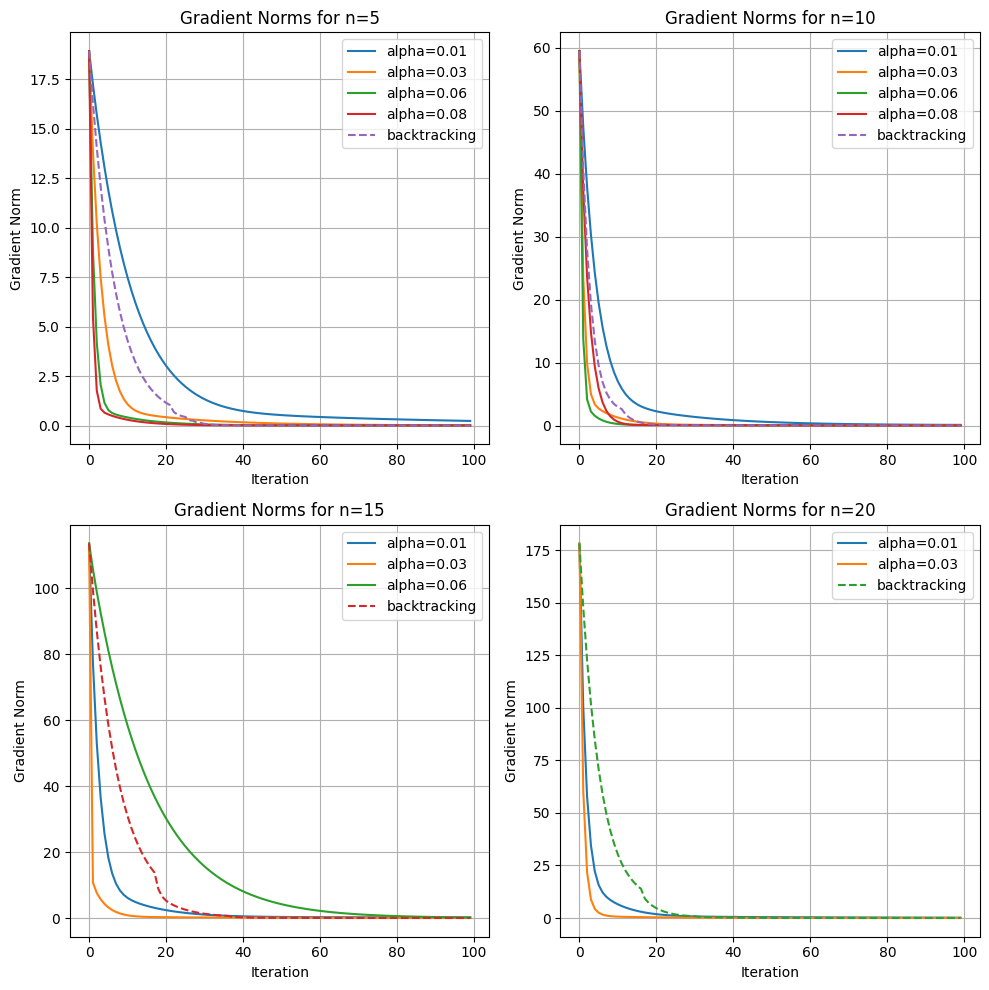

In [37]:
def generate_coeff(n):
    A = np.vander(np.linspace(0,1,n),n)
    x = np.ones((n,))
    b = A@x
    return A,b

def f3(n):
    A,b = generate_coeff(n)
    def funct(x):
        return (np.linalg.norm(A@x - b, 2))**2 / 2
    return funct

def grad_f3(n):
    A,b = generate_coeff(n)
    def grad_func(x):
        return A.T@(A@x - b)
    return grad_func

test2(f3, grad_f3, np.array([0.01, 0.03, 0.06, 0.08]), [5,10,15,20])

As can be observed in all of the studied cases the algorithm is not able to converge in `maxit` steps, but nevertheless the error made by Gradient Descent when increasing $\alpha$ decreases. From the table can be also seen that the backtracking algorithm outperformes the one with the constant initialization of $\alpha$. By pushing the `maxit` to $1000$ the convergence speed can be measured because the algorithm actually converges for different values of $\alpha$.

Another interesting property of the problem is that by increasing the dimension of the matrix $A$ some values of $\alpha$ are responsible for the divergence of the Gradient Descent. This is linked to the fact that increasing the dimension of the problem the condition number of the matrix exponentially increases and this means that the conditioning of the optimization problem becomes larger. As discussed previously a smaller step size $\alpha$ is required in these cases to avoid diverging in the more steeper directions.

**Fourth function analysis**

The function considered in this experiment is $f: \mathbb{R}^n \rightarrow \mathbb{R}$ such that:
$$f(x) = \frac{1}{2}\|Ax - b\|^{2}_{2} + \frac{\lambda}{2}\|x\|^{2}_{2},$$

and its gradient is $\nabla f(x) = A^T(Ax-b) + \lambda x$. Note that this function is convex as its the sum of two convex functions.

In [38]:
def f4(n, lam):
    lam = lam
    A,b = generate_coeff(n)
    def funct(x):
        return 0.5 * (np.linalg.norm(A@x - b, 2))**2 + (lam/2)*(np.linalg.norm(x,2)**2) 
    return funct

def grad_f4(n, lam):
    lam = lam
    A,b = generate_coeff(n)
    def grad_func(x):
        return (A.T@(A@x - b) + lam * x)
    return grad_func

Below the testing procedure for this function is defined. The procedure prints a table with the following information for different dimensions $n$ of the function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, and consequently of the matrix $A$:
* The considered $\lambda$ value,
* Solution given by the descent algorithm,
* The number of iterations needed for the convergence of the algorithm.

Moreover the testing procedure produces also a plot, where the evolution of the gradient norm for each dimension $n$ and for each considered value $\lambda$ is visualized. 


In [39]:
def test3(f, grad_f, alpha, ns, lambs):

    d = 0
    sol_hist = []
    k_hist = []
    plt.figure(figsize=(11,11))

    for n in ns:
        solutions = {}
        ks = {}
        grad_norms = []

        for lamb in lambs:
                solutions[lamb] = []
                ks[lamb] = []
                x0 = np.zeros((n,))
                xks_b, k_b, f_val_b, grad_norm_b = GD_backtracking(f(n, lamb), grad_f(n, lamb), x0)
                xks, k, f_val, grad_norm = GD(f(n, lamb), grad_f(n, lamb), x0, alpha)
                solutions[lamb].append(xks[-1])
                solutions[lamb].append(xks_b[-1])
                ks[lamb].append(k)
                ks[lamb].append(k_b)
                grad_norms.append(grad_norm_b)
                
        d += 1
        plt.subplot(3, math.ceil(len(ns)/3),d)
        for i in range(len(lambs)):
            plt.plot(grad_norms[i], label=f'lambda = {lambs[i]}')
        plt.xlabel('Iteration')  
        plt.ylabel('Gradient Norm') 
        plt.legend() 
        plt.title(f'Matrix dimension n={n}')
        plt.grid()

        sol_hist.append(solutions)
        k_hist.append(ks)

    for j, n in enumerate(ns):
        print(f"\nMatrix dimension {n}")
        headers = ["Lambda value", "Alpha assignment", "Solution", "Iterations"]
        table = []
        for i, lamb in enumerate(lambs):
            solution = sol_hist[j][lamb]
            iters_back = k_hist[j][lamb][1]
            table.append([lamb, "Backtracking", solution[1], iters_back])
        print(tabulate(table, headers=headers, tablefmt="grid"))

    plt.tight_layout()
    plt.show()

Below the testing procedure is invoked and its results can be seen. I have only considered the backtracking algorithm. For the case where $\lambda=0$ the results are the ones with the third function, while later on when increasing the value of $\lambda$ it can be observed that the number of iterations required for the convergence decreases and the solution also changes $\rightarrow$ smaller solution values are favored. 


Matrix dimension 5
+----------------+--------------------+----------------------------------------------------------+--------------+
|   Lambda value | Alpha assignment   | Solution                                                 |   Iterations |
+================+====================+==========================================================+==============+
|           0    | Backtracking       | [0.98199633 0.9961435  1.00991928 1.01376098 0.99555965] |           99 |
+----------------+--------------------+----------------------------------------------------------+--------------+
|           0.25 | Backtracking       | [0.89118539 0.9214215  0.96168725 1.01245234 1.01216725] |           67 |
+----------------+--------------------+----------------------------------------------------------+--------------+
|           0.5  | Backtracking       | [0.83577503 0.86981594 0.91723107 0.98310386 1.02325314] |           74 |
+----------------+--------------------+-----------------------------

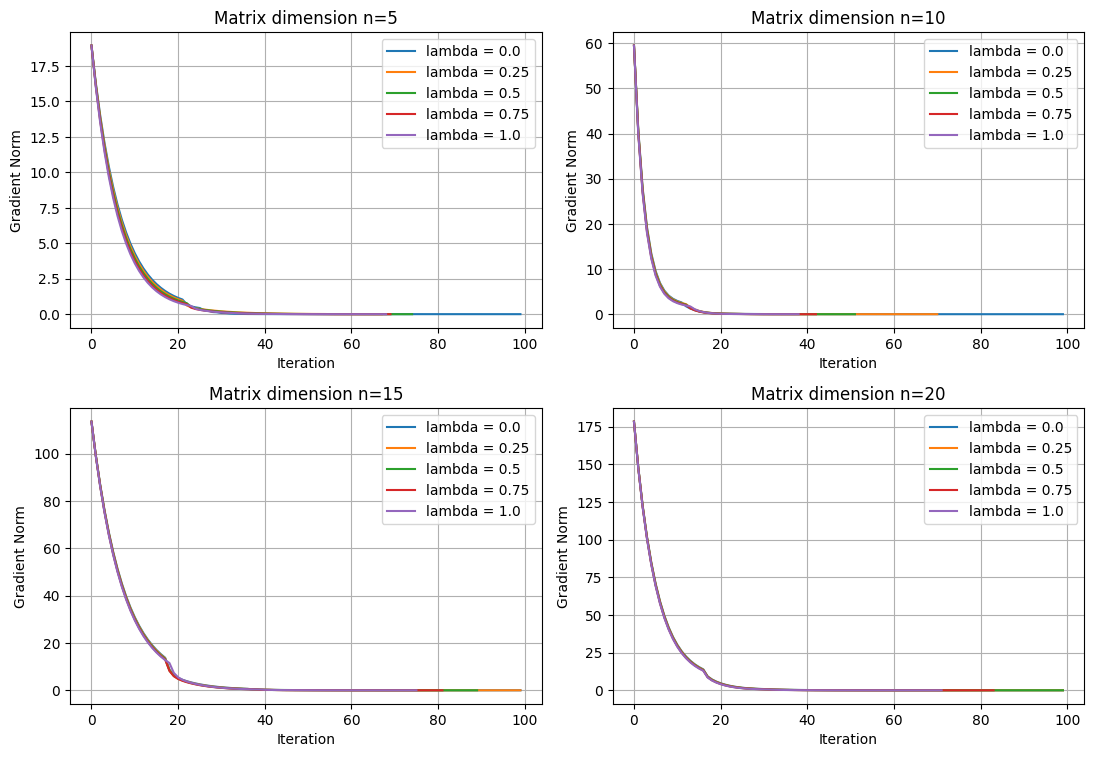

In [40]:
test3(f4, grad_f4, 0.04, [5,10,15,20], np.linspace(0,1,5))

**Fifth functions analysis**

The function considered in this experiment is $f: \mathbb{R} \rightarrow \mathbb{R}$ such that
$$f(x) = x^4 + x^3 - 2x^2 -2x.$$
The function is not convex and because it is a scalar function of one variable it can be easily plotted with the following code.

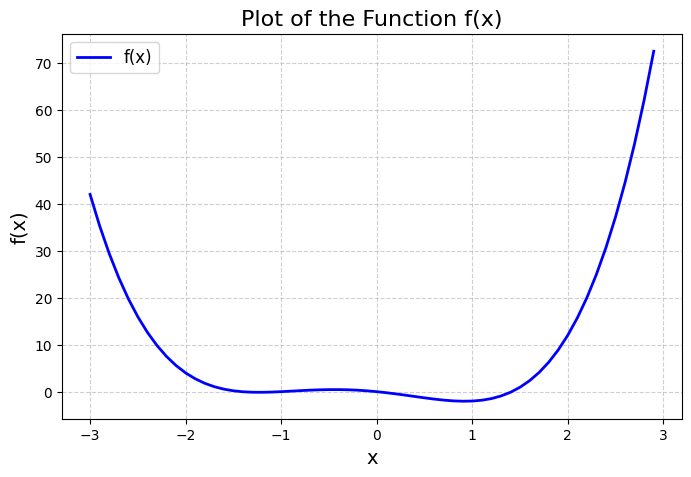

In [41]:
def f5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f5(x):
    return np.array(4*x**3 + 3*x**2 - 4*x - 2)

x_values = np.arange(-3, 3, 0.1)
y_values = [f5(x) for x in x_values]

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='f(x)', color='blue', linewidth=2)
plt.title("Plot of the Function f(x)", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

Below I define the testing procedure that I will use to test the gradient descent algorithm by considering some $\alpha$ values for different initial points $x_0$. 

In [42]:
def test5(f, grad_f, x0s, alphas):

    plt.figure(figsize=(10,6))
    solutions = []
    iterations = []
    j = 1
    
    for x0 in x0s:
        plt.subplot(1, len(x0s), j)
        j += 1
        xks_b, k_b, f_val_b, grad_norm_b = GD_backtracking(f, grad_f, x0)

        solutions_alpha = []
        ks_alpha = []
        grad_norms = []

        for alpha in alphas:
            xs, k, f_val, grad_norm = GD(f, grad_f, x0, alpha)
            solutions_alpha.append(xs[-1])
            ks_alpha.append(k)
            grad_norms.append(grad_norm)

        solutions_alpha.append(xks_b[-1])
        ks_alpha.append(k_b)
        grad_norms.append(grad_norm_b)
        solutions.append(solutions_alpha)
        iterations.append(ks_alpha)

        for i in range(len(alphas)):
            plt.plot(grad_norms[i], label=f'alpha={round(alphas[i],2)}')
        plt.plot(grad_norm_b, label='backtracking')
        plt.legend() 
        plt.xlabel('Iteration')  
        plt.ylabel('Gradient Norm')  
        plt.title(f'Gradient Descent from x0={x0}')

    plt.show()
    return solutions, iterations

The non-convexity of the considered function implies that the GD algorithm doesn't give any guarantee of finding the global optima, as this depends both on the choices of $\alpha$ and $x_0$.

To explore how does the GD algorithm evolve with the proposed non convex function I will consider four different initial points and for each of them some values for the step size $\alpha$. From the plot of the function we can observe that the function has a local maximum that divides the function plot in two valley like figures. The left valley contains the local minima, while the right one contains the global one. The considered initial points for the GD algorithm respect the following taxonomy, that enables me to better analyse how does the step size influence the convergence in the local or global minima:
- **Start on the right of local maximum**:
    - Small initial gradient: $0$
    - Large initial gradient: $2$

- **Start on the left of local maximum**:
    - Small initial gradient: $-0.8$
    - Large initial gradient: $-2.3$

In the following code snippet the first two points, e.g. $0$ and $-0.8$, are considered. 

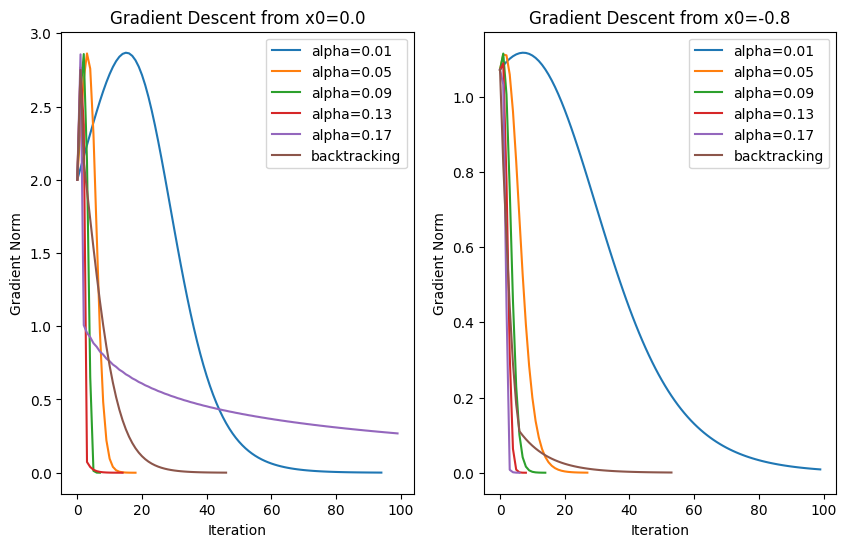


Initial Point: 0.0
+--------------------+------------+--------------+
| Alpha assignment   |   Solution |   Iterations |
+====================+============+==============+
| 0.01               |   0.922147 |           94 |
+--------------------+------------+--------------+
| 0.05               |   0.922218 |           18 |
+--------------------+------------+--------------+
| 0.09               |   0.922221 |            7 |
+--------------------+------------+--------------+
| 0.13               |   0.922219 |           14 |
+--------------------+------------+--------------+
| 0.17               |   0.944491 |           99 |
+--------------------+------------+--------------+
| Backtracking       |   0.922174 |           46 |
+--------------------+------------+--------------+

Initial Point: -0.8
+--------------------+------------+--------------+
| Alpha assignment   |   Solution |   Iterations |
+====================+============+==============+
| 0.01               |   -1.23094 |      

In [43]:
alphas = np.arange(0.01,0.2,0.04)
x0s = np.array([0,-0.8])
solutions, iterations = test5(f5, grad_f5, x0s, alphas)

for j, x0 in enumerate(x0s):
    print(f"\nInitial Point: {x0}")
    headers = ['Alpha assignment', 'Solution', 'Iterations']
    table = []

    for i, alpha in enumerate(alphas):
        solution = solutions[j][i]
        iters = iterations[j][i]
        table.append([alpha, solution, iters])
    table.append(['Backtracking', solutions[j][-1], iterations[j][-1]])
    
    print(tabulate(table, headers=headers, tablefmt="grid"))

From the output of the code it holds that even by increasing the step size the algorithm doesn't _jump_ on the other side of the local maxima, so it doesn't get in the other valley. This means that by starting at the right side the optimization procedure converges to the global optima, while for $-0.8$ GD converges in the local optima. The backtracking procedure in this case is not able to converge to the global optima, when starting on the left side. Note that for $\alpha=0.01$ in one case the algorithm is able to converge in the maximum number of iterations, $100$, but in the other case this choice implies a to timid step for the algorithm to converge in time.

When considering the initial points, for which the gradient of the function is larger, e.g. $2$ and $-2,3$, the behavior differs as can be seen from the result of the following code snippet. By increasing the value of $\alpha$ the optimization algorithm overshoots the local minima of the valley where it started, converging eventually in the minima of the second valley.

The backtracking algorithm still converges in the minima of the valley where the first solution $x_0$ was.

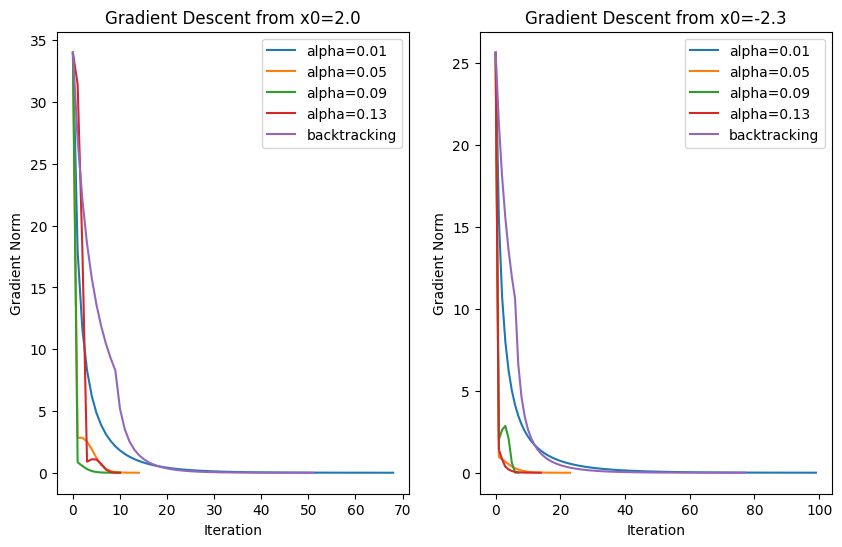


Initial Point: 2.0
+--------------------+------------+--------------+
| Alpha assignment   |   Solution |   Iterations |
+====================+============+==============+
| 0.01               |   0.922304 |           68 |
+--------------------+------------+--------------+
| 0.05               |   0.922166 |           14 |
+--------------------+------------+--------------+
| 0.09               |  -1.23217  |           10 |
+--------------------+------------+--------------+
| 0.13               |  -1.23214  |           10 |
+--------------------+------------+--------------+
| Backtracking       |   0.922276 |           51 |
+--------------------+------------+--------------+

Initial Point: -2.3
+--------------------+------------+--------------+
| Alpha assignment   |   Solution |   Iterations |
+====================+============+==============+
| 0.01               |  -1.23253  |           99 |
+--------------------+------------+--------------+
| 0.05               |  -1.2322   |      

In [44]:
alphas = np.arange(0.01,0.14,0.04)
x0s = np.array([2,-2.3])
solutions, iterations = test5(f5, grad_f5, x0s, alphas)

for j, x0 in enumerate(x0s):
    print(f"\nInitial Point: {x0}")
    headers = ['Alpha assignment', 'Solution', 'Iterations']
    table = []
    for i, alpha in enumerate(alphas):
        solution = solutions[j][i]
        iters = iterations[j][i]
        table.append([alpha, solution, iters])
    table.append(['Backtracking', solutions[j][-1], iterations[j][-1]])
    print(tabulate(table, headers=headers, tablefmt="grid"))

## Optimization via Stochastic Gradient Descent

The loss function I will consider is the MSE, which for polynomial regression takes the form:
$$\ell(\theta;X,Y) = \frac{1}{N} \|\Phi(X)^T\theta - Y\|^2_2,$$  
where $\Phi(X)$ matrix is the feature matrix, defined as
$$
\Phi(X) = \begin{bmatrix} 1 & 1 & \dots & 1 \\ x^1 & x^2 & \dots & x^N \\ (x^1)^2 & (x^2)^2 & \dots & (x^N)^2 \\ \vdots & \vdots & \dots & \vdots \\ (x^1)^{K-1} & (x^2)^{K-1} & \dots & (x^N)^{K-1} \end{bmatrix} \in \mathbb{R}^{K \times N}.
$$

Training the model means finding $\theta^*$ such that:
$$
\theta^*=\argmin_{\theta \in \mathbb{R}^K}\frac{1}{N} \|\Phi(X)^T\theta - Y\|^2_2.
$$

The gradient of the loss function is:
$$\nabla\ell(\theta;X,Y) = \frac{2}{N}(\Phi(X)\Phi(X)^T\theta - \Phi(X)Y).$$

In the following I load the dataset and split it in training and test set, with the same procedure used in homework 2. Moreover I define the polynomial model and the feature matrix as we saw in class.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('poly_regression_large.csv')
reg = np.array(df)

X = reg[:,1]
X = X.reshape((1,X.shape[0]))
Y = reg[:,2]
 
def split_data(X, Y, Ntrain):
    N = X.shape[1]
    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]
    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]
    return (Xtrain, Ytrain), (Xtest, Ytest)

(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, int((8/10)*X.shape[1]))

small = pd.read_csv('poly_regression_small.csv')
reg_small = np.array(small)
X_small = reg_small[:,1]
X_small = X_small.reshape((1,X_small.shape[0]))
y_small = reg_small[:,2]

def generate_matrix(x, K):
    Phi = np.zeros((K, x.shape[1]))
    for i in range(K):
        Phi[i,:] = x ** i
    return Phi

def model(x, theta):
    val = 0
    for i in range(len(theta)):
        val += x ** i * theta[i]
    return val

In the code snippet below I visualize the three different datasets and the number of observations each one of them has, just to understand how much smaller the second train set with respect to the first one is. 

Test data: 200 samples.
Train data, from large dataset: 800 samples.
Train data, from small dataset: 50 samples.


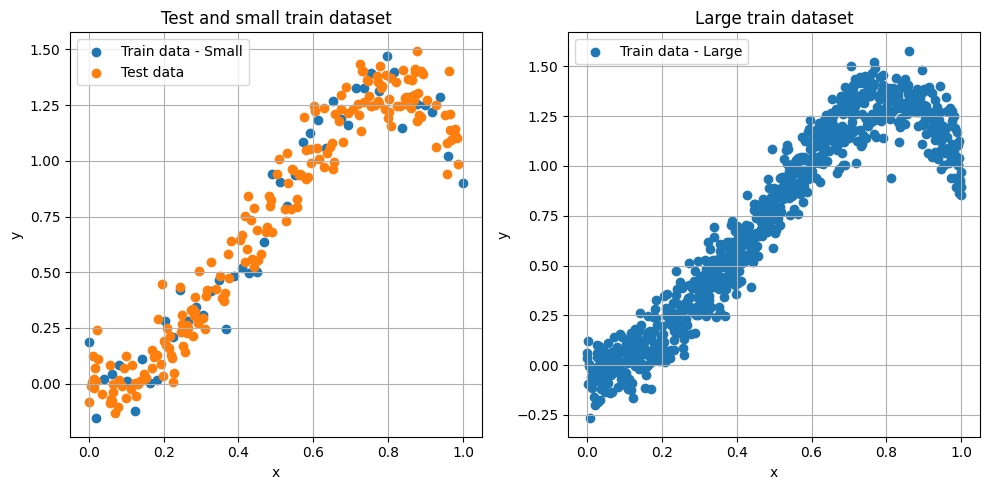

In [46]:
print(f'Test data: {Xtest.shape[1]} samples.')
print(f'Train data, from large dataset: {Xtrain.shape[1]} samples.')
print(f'Train data, from small dataset: {X_small.shape[1]} samples.')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_small, y_small, label='Train data - Small')
plt.scatter(Xtest, Ytest, label='Test data')
plt.title('Test and small train dataset')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(Xtrain, Ytrain, label='Train data - Large')
plt.title('Large train dataset')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

The loss and its gradient are here implemented as I have previously defined them.

In [47]:
def loss(theta, Phi, y):
    return np.linalg.norm(((Phi.T@theta - y)),2)**2 / y.shape[0]

def grad_loss(theta, Phi, y):
    return 2*((Phi@Phi.T@theta) - (Phi@y)) / y.shape[0]

The following code snippets contain the implementation of the Stochastic Gradient Descent and Gradient Descent (with backtracking). These methods are the one used for the solving of the optimization problem.

In [48]:
def SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs, K):
    X, y = D 
    N = X.shape[1]
    d = theta0.shape[0]
    idx = np.arange(0, N) 
    
    theta_history = np.zeros((n_epochs, d)) 
    loss_history = np.zeros((n_epochs, )) 
    grad_norm_history = np.zeros((n_epochs, )) 
    
    theta = theta0
    for epoch in range(n_epochs):
        np.random.shuffle(idx)
        X = X[:,idx]
        y = y[idx]

        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):

            batch_end = min(batch_start + batch_size, N)
            X_batch = X[:,batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            Phi = generate_matrix(X_batch, K)
            gradient = grad_loss(theta, Phi, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            theta = theta - alpha * gradient

        theta_history[epoch] = theta
        Phi = generate_matrix(X, K)
        loss_history[epoch] = loss(theta, Phi, y)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return theta_history, loss_history, grad_norm_history

In [55]:
def backtracking(f, grad_f, theta, Phi, y):
    alpha = 1
    c = 0.8
    tau = 0.25  
    
    grad = grad_f(theta, Phi, y)  
    grad_norm_squared = np.linalg.norm(grad, 2) ** 2 
    while f(theta - alpha * grad_f(theta, Phi, y), Phi, y) > f(theta, Phi, y) - c * alpha * grad_norm_squared:
        alpha = tau * alpha
        
    return alpha

def GD_backtracking(loss, grad_loss, D, theta0, K,  maxit=800, tolf=1e-5, tolx=1e-5):
    Xtrain, y = D  
    
    loss_history = np.zeros((maxit, ))
    grad_norm_history = np.zeros((maxit,))
    theta_history = []

    Phi = generate_matrix(Xtrain, K)

    theta_history.append(theta0)
    loss_history[0] = loss(theta0, Phi, y)
    grad_norm_history[0] = np.linalg.norm(grad_loss(theta0, Phi, y), 2)

    for k in range (1, maxit):
        alpha = backtracking(loss, grad_loss, theta0, Phi, y)
        theta = theta0 - alpha * grad_loss(theta0, Phi, y)
        theta_history.append(theta)

        loss_history[k]= loss(theta, Phi, y)
        grad_norm_history[k] = np.linalg.norm(grad_loss(theta, Phi, y), 2)

        if np.linalg.norm(grad_loss(theta, Phi, y), 2) < tolf * grad_norm_history[0] or np.linalg.norm(theta - theta0, 2) < tolx:
            break 

        theta0 = theta
        
    loss_history = loss_history[:k+1]
    grad_norm_history = grad_norm_history[:k+1]

    return theta_history, k, loss_history, grad_norm_history

Below, I implement the procedures used for the training of the polynomial model. These procedures perform a simple call to the optimization method they consider and return only the found solution. The optimization methods in exam are:
- Stochastic Gradient Descent
- Grdient Descent 

In [56]:
def train_SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs, K):
    thetas, losses, grad_norms = SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs, K)
    return thetas[-1]

def train_GDB(loss, grad_loss, D, theta0, K, maxit=800):
    thetas, k, f_val, grad_norm = GD_backtracking(loss, grad_loss, D, theta0, K, maxit)
    return thetas[-1]

**Comparing regression models**

In the following code I define the function `test_reg_models`, which compares the performances of the regression models learned with the three methods defined before on the two different train sets, plotting also the prediciton curve of each considered model. The comparing metric is the mean square error:
$$Err = \frac{1}{N_{test}}\sum_{i=1}^{N_{\text{test}}} \left(f_{\theta}(x^i) - y^i\right)^2,$$

where $f_{\theta}$ is the polynomial model 
$$f_\theta(x^i) = \phi^T(x^i) \theta, \qquad \phi(x) = [1, x, x^2, \dots, x^{K-1}]^T,$$
or equivalently as before $f_\theta(x^i) = \Phi(x^i)^T \theta$.

The following code is executed by fixing the parameter $K$ of the model to be learned at $4,$ which means that the polynomial is of degree $3$. 

The error of the model trained with SGD method on large dataset is: 0.0139.
The error of the model trained with GD method on large dataset is: 0.016.
The error of the model trained with SGD method on small dataset is: 0.0192.
The error of the model trained with GD method on small dataset is: 0.0154.


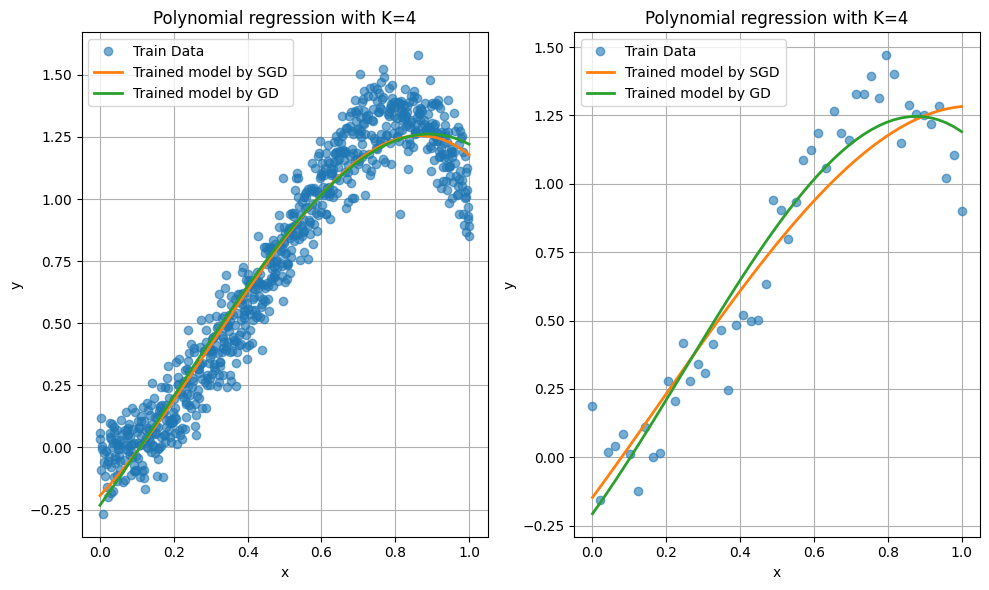

In [57]:
methods = ['SGD', 'GD', 'SGD', 'GD']

def plot_compare(x,y,thetas,K):
    plt.title(f"Polynomial regression with K={K}")
    plt.plot(x, y, 'o', label='Train Data', alpha=0.6)
    for i in range(len(thetas)):
        plt.plot(x, model(x,thetas[i]), linewidth=2, label=f'Trained model by {methods[i]}')
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()

def test_reg_models(loss, grad_loss, DtrainLarge, DtrainSmall, Dtest, K, theta0, alpha, size_batch, n_epochs):
    perf = []

    theta_SGD_L = train_SGD(loss, grad_loss, DtrainLarge, theta0, alpha, size_batch, n_epochs, K)
    theta_GD_L = train_GDB(loss, grad_loss, DtrainLarge, theta0, K )
    theta_SGD_S = train_SGD(loss, grad_loss, DtrainSmall, theta0, alpha, size_batch, n_epochs, K)
    theta_GD_S = train_GDB(loss, grad_loss, DtrainSmall, theta0, K )
    found_thetas = [theta_SGD_L, theta_GD_L, theta_SGD_S, theta_GD_S]
    
    for theta in found_thetas:
        predictions = model(Dtest[0], theta)
        errors = (predictions - Dtest[1]) ** 2
        mean_error = np.mean(errors)
        perf.append(mean_error)

    Xtrain_large = DtrainLarge[0]
    Ytrain_large = DtrainLarge[1]
    Xtrain_large = Xtrain_large.flatten()
    sorted_indices = np.argsort(Xtrain_large) 
    Xtrain_sorted_large = Xtrain_large[sorted_indices]
    Ytrain_sorted_large = Ytrain_large[sorted_indices]

    Xtrain_small = DtrainSmall[0]
    Ytrain_small = DtrainSmall[1]
    Xtrain_small = Xtrain_small.flatten()
    sorted_indices = np.argsort(Xtrain_small) 
    Xtrain_sorted_small = Xtrain_small[sorted_indices]
    Ytrain_sorted_small = Ytrain_small[sorted_indices]

    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plot_compare(Xtrain_sorted_large, Ytrain_sorted_large, found_thetas[0:2], K)
    plt.subplot(1,2,2)
    plot_compare(Xtrain_sorted_small, Ytrain_sorted_small, found_thetas[2:], K)
    plt.tight_layout()
    return perf, found_thetas

errors, thetas = test_reg_models(loss, grad_loss, (Xtrain,Ytrain), (X_small, y_small), (Xtest, Ytest), 4, np.zeros((4,)), 0.1, 8, 200)
for i in range(len(methods)):
    dataset = 'large'
    if i >= 2:
        dataset = 'small'
    print(f"The error of the model trained with {methods[i]} method on {dataset} dataset is: {round(errors[i], 4)}.")
plt.show()

From the results of the code snippet underfitting can be spotted, as the model is not able to capture the data distribution. There is no big difference between the model trained on the larger or smaller training set, apart from the fact that the SGD on the larger dataset is the better performing, while on the small one is the worse one.

**Varying the degree K**

Below I repeat the previous approach but I vary the degree of the polynomial model. It can be observed that the increase in model's complexity $K$ does not greatly influence its MSE, once the degree becomes high enough. As noticed earlier $K=3$ is too small to capture the $y$ dependency on $x$ and this can be seen both from the error values and the plot of the polynomial. 


Degree of the polynomial: 3
+----------+-----------+---------+
| Method   | Dataset   |   Error |
+==========+===========+=========+
| SGD      | large     |  0.0215 |
+----------+-----------+---------+
| GD       | large     |  0.0213 |
+----------+-----------+---------+
| SGD      | small     |  0.0249 |
+----------+-----------+---------+
| GD       | small     |  0.0215 |
+----------+-----------+---------+

Degree of the polynomial: 6
+----------+-----------+---------+
| Method   | Dataset   |   Error |
+==========+===========+=========+
| SGD      | large     |  0.0096 |
+----------+-----------+---------+
| GD       | large     |  0.0103 |
+----------+-----------+---------+
| SGD      | small     |  0.012  |
+----------+-----------+---------+
| GD       | small     |  0.0097 |
+----------+-----------+---------+

Degree of the polynomial: 9
+----------+-----------+---------+
| Method   | Dataset   |   Error |
+==========+===========+=========+
| SGD      | large     |  0.0101 |
+--

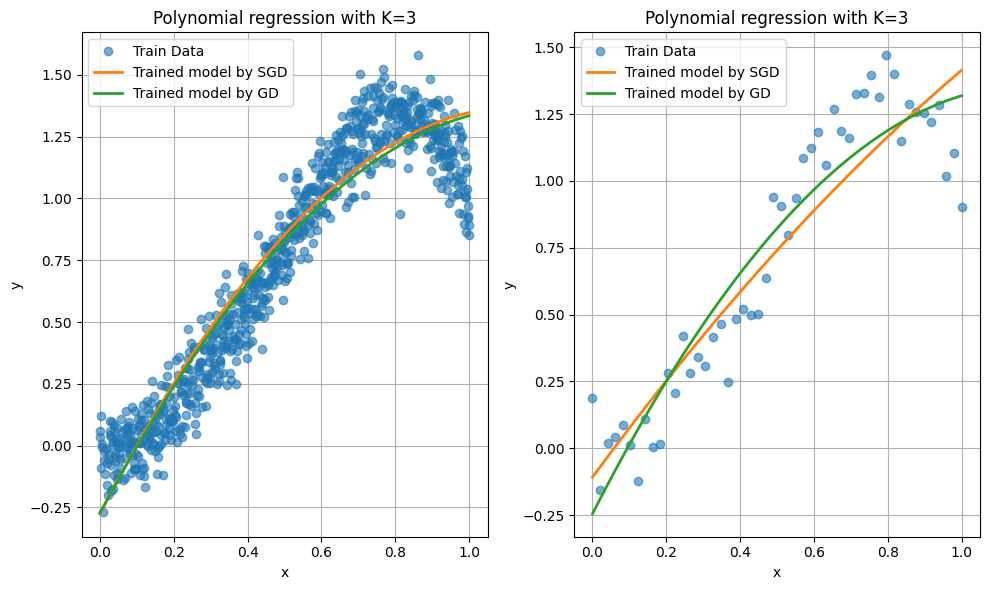

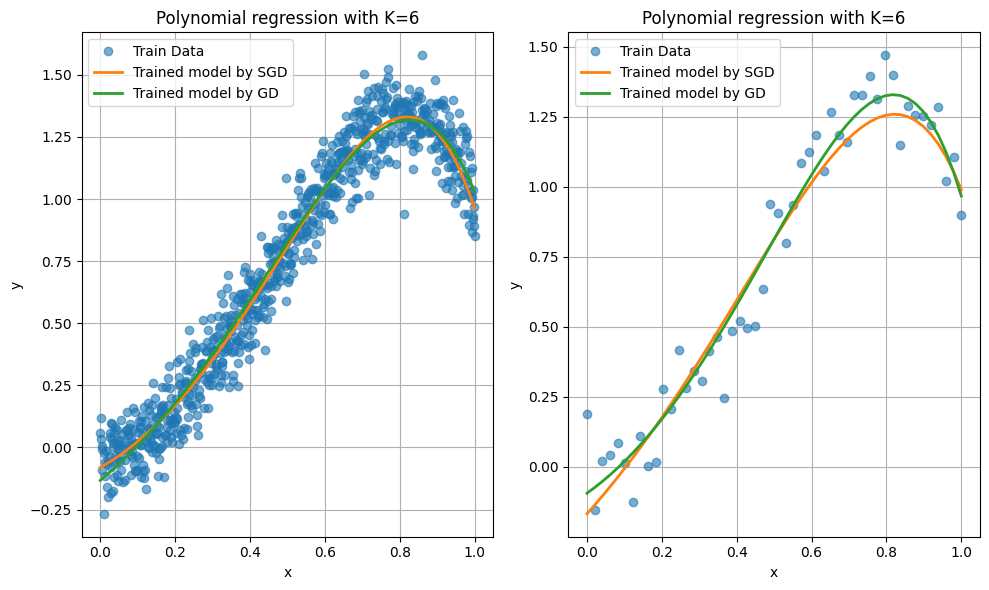

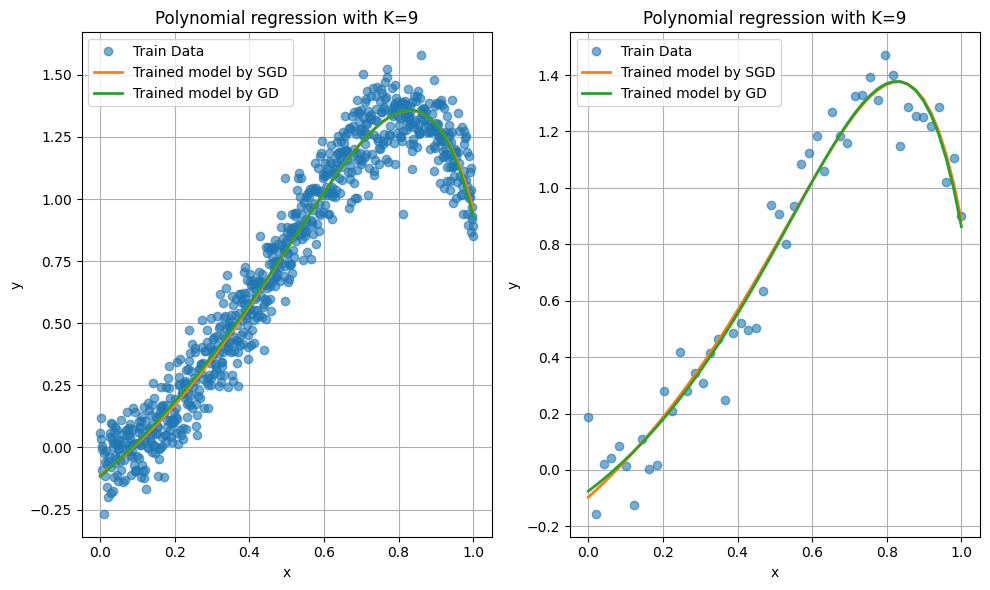

In [58]:
from tabulate import tabulate

ks = [3,6,9]
er = []
th = []
for j in range(len(ks)):
    errors, thetas = test_reg_models(loss, grad_loss, (Xtrain,Ytrain), (X_small,y_small), (Xtest, Ytest), ks[j], np.zeros((ks[j],)), 0.1, 8, 200)
    er.append(errors)
    th.append(thetas)

for j, k in enumerate(ks):
    print(f"\nDegree of the polynomial: {k}")
    headers = ['Method', 'Dataset', 'Error']
    table = []
    for i, method in enumerate(methods):
        error = er[j][i]
        if i >= 2:
            table.append([method, 'small', round(error,4)])
        else:
            table.append([method, 'large', round(error,4)])
    print(tabulate(table, headers=headers, tablefmt="grid"))

**Comparison with true parameters**

The following code plots the polynomial model of degree $4$, so $K=5$, trained with the previously defined methods and plots also the true solution of the regression problem. Moreover it prints out the weights determined by each method and compares them to the weights of the true solution $\theta_{true} = [0,0,4,0,-3]^T$.


Weights of the model with degree 4
+---------------+-----------------+------------+----------+----------+------------+----------+---------+
| Method        | Train Dataset   |         θ₀ |       θ₁ |       θ₂ |         θ₃ |       θ₄ |   Error |
+===============+=================+============+==========+==========+============+==========+=========+
| SGD           | large           | -0.0957782 | 0.825141 | 2.52089  |  0.342476  | -2.52177 |  0.0098 |
+---------------+-----------------+------------+----------+----------+------------+----------+---------+
| GD            | large           | -0.172525  | 1.51475  | 1.45678  | -0.0554639 | -1.6283  |  0.0119 |
+---------------+-----------------+------------+----------+----------+------------+----------+---------+
| SGD           | small           | -0.184644  | 1.7751   | 0.987406 | -0.213987  | -1.21719 |  0.0133 |
+---------------+-----------------+------------+----------+----------+------------+----------+---------+
| GD            | s

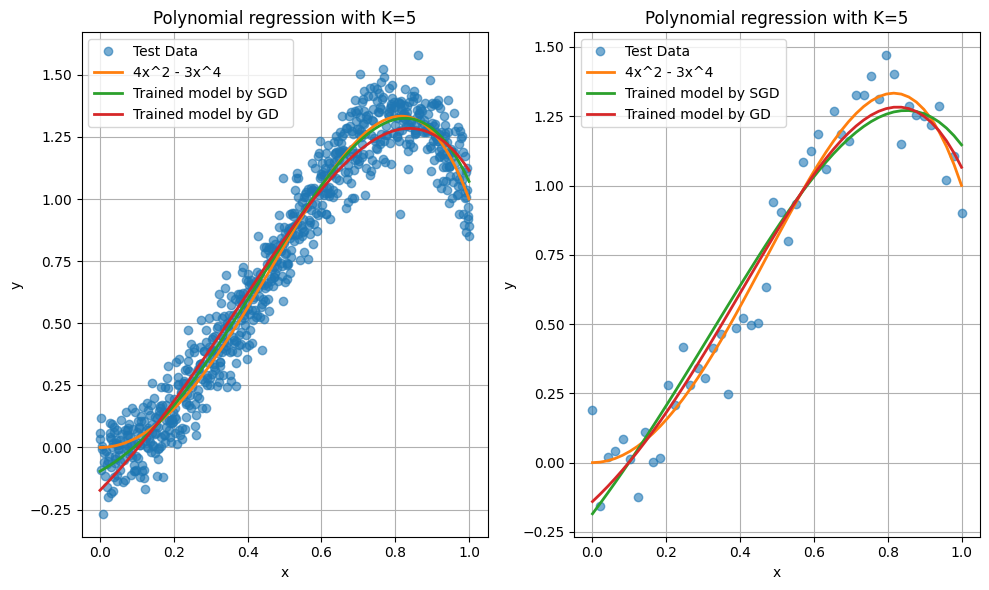

In [59]:
def plot_compare(x,y,thetas,K):

    plt.title(f"Polynomial regression with K={K}")
    plt.plot(x, y, 'o', label='Test Data', alpha=0.6)
    theta_true = [0,0,4,0,-3]
    plt.plot(x, model(x, theta_true), linewidth=2, label=r"4x^2 - 3x^4")
    for i in range(len(thetas)):
        plt.plot(x, model(x,thetas[i]), linewidth=2, label=f'Trained model by {methods[i]}')
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()

errors, thetas = test_reg_models(loss, grad_loss, (Xtrain,Ytrain), (X_small, y_small), (Xtest, Ytest), 5, np.zeros((5,)), 0.1, 8, 200)

print(f"\nWeights of the model with degree 4")
headers = ['Method','Train Dataset',r'θ₀',r'θ₁',r'θ₂',r'θ₃',r'θ₄','Error']
table = []
for i, method in enumerate(methods):
    error = errors[i]
    thet = thetas[i]
    if i >= 2:
        table.append([method, 'small',thet[0],thet[1],thet[2],thet[3],thet[4],round(error,4)])
    else:
        table.append([method, 'large',thet[0],thet[1],thet[2],thet[3],thet[4],round(error,4)])
true = [0,0,4,0,-3]
predictions = model(Xtest, true)
errors_true = (predictions - Ytest) ** 2
mean_error = np.mean(errors_true)
table.append(['True solution', ' ',true[0], true[1], true[2], true[3], true[4], round(mean_error,4)])
print(tabulate(table, headers=headers, tablefmt="grid"))

By considering the found parameters it can be observed that the algorithms didn't get near the optimal solution yet. This is because the used parameters are too conservative. For example, by increasing the number of conceeded iterations for the GD to $8000$ and increasing the number of epochs to $1000$ the obtained parameters resemble in a closer way the true solution. The SGD on the small set is the worse one in approximating the solution and also considering the error.


Weights of the model with degree 4
+---------------+-----------------+------------+-----------+---------+----------+----------+---------+
| Method        | Train Dataset   |         θ₀ |        θ₁ |      θ₂ |       θ₃ |       θ₄ |   Error |
+===============+=================+============+===========+=========+==========+==========+=========+
| SGD           | large           | -0.0418362 |  0.311473 | 3.24279 | 0.678914 | -3.2254  |  0.0094 |
+---------------+-----------------+------------+-----------+---------+----------+----------+---------+
| GD            | large           | -0.044664  |  0.356656 | 3.21215 | 0.6284   | -3.14835 |  0.0092 |
+---------------+-----------------+------------+-----------+---------+----------+----------+---------+
| SGD           | small           | -0.12071   |  1.11745  | 2.0754  | 0.141228 | -2.14586 |  0.0105 |
+---------------+-----------------+------------+-----------+---------+----------+----------+---------+
| GD            | small           |  

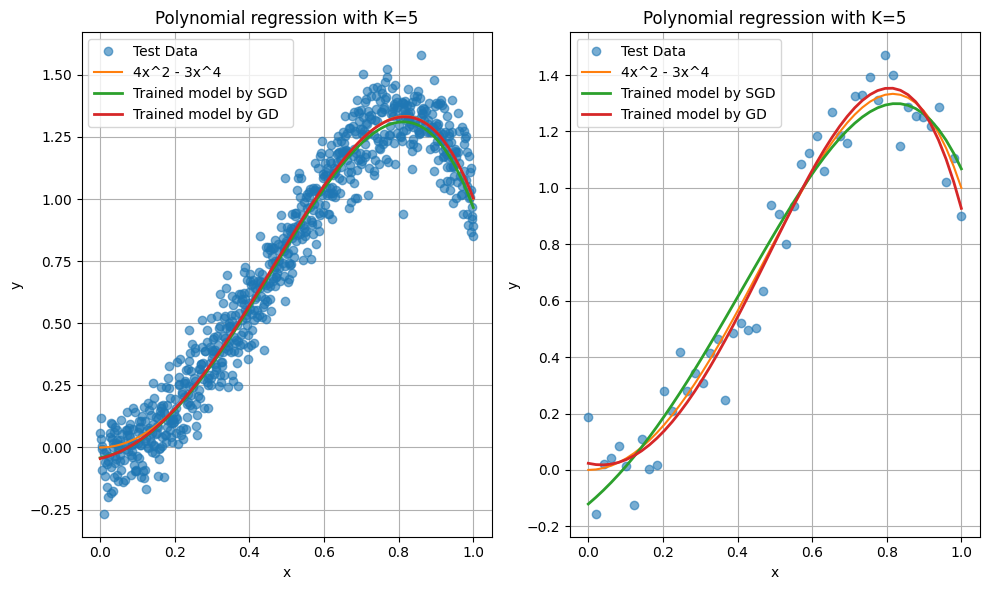

In [60]:
methods = ['SGD', 'GD', 'SGD', 'GD']

def train_GDB(loss, grad_loss, D, theta0, K, maxit=8000):
    thetas, k, f_val, grad_norm = GD_backtracking(loss, grad_loss, D, theta0, K, maxit)
    return thetas[-1]

def plot_compare(x,y,thetas,K):
    plt.title(f"Polynomial regression with K={K}")
    plt.plot(x, y, 'o', label='Test Data', alpha=0.6)
    theta_true = [0,0,4,0,-3]
    plt.plot(x, model(x, theta_true), label=r"4x^2 - 3x^4")
    for i in range(len(thetas)):
        plt.plot(x, model(x,thetas[i]),linewidth=2, label=f'Trained model by {methods[i]}')
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()

errors, thetas = test_reg_models(loss, grad_loss, (Xtrain,Ytrain), (X_small, y_small), (Xtest, Ytest), 5, np.zeros((5,)), 0.1, 8, 1000)

print(f"\nWeights of the model with degree 4")
headers = ['Method','Train Dataset',r'θ₀',r'θ₁',r'θ₂',r'θ₃',r'θ₄','Error']
table = []
for i, method in enumerate(methods):
    error = errors[i]
    thet = thetas[i]
    if i >= 2:
        table.append([method, 'small',thet[0],thet[1],thet[2],thet[3],thet[4],round(error,4)])
    else:
        table.append([method, 'large',thet[0],thet[1],thet[2],thet[3],thet[4],round(error,4)])
true = [0,0,4,0,-3]
predictions = model(Xtest, true)
errors_true = (predictions - Ytest) ** 2
mean_error = np.mean(errors_true)
table.append(['True solution', ' ',true[0], true[1], true[2], true[3], true[4], round(mean_error,4)])
print(tabulate(table, headers=headers, tablefmt="grid"))